In [15]:
import torch
import numpy as np
import os
import matplotlib.pyplot as plt

In [16]:
expl_method = "GradCAM"
# expl_method = 'LayerXAct'
# expl_method = 'LayerDL'
# transform = False
# transform = True
# transform = ['color'] 
# transform = ['spatial', 'noise', 'color']
transform = None
tester = "ConfAOPC"
# tester = "OrigAOPC"
seed = 0
mode = "insertion"

In [17]:
with open(f"val_center_crop_224_seed_{seed}.npy", "rb") as f:
    filelist = np.load(f)

In [18]:
base = torch.zeros(21)
our = torch.zeros(21)
read_num = 0

for filepath in filelist:
    filename = os.path.basename(filepath)

    log_name = f"./aopc_results/{tester}_transform_{transform}_mode_{mode}_expl_method_{expl_method}_seed_{seed}_{filename}.pt"
    try:
        log = torch.load(log_name)
        base += log[0]
        our += log[1]
        read_num += 1
    except:
        break

In [19]:
base / read_num

tensor([0.0012, 0.0024, 0.0040, 0.0059, 0.0090, 0.0108, 0.0138, 0.0178, 0.0227,
        0.0272, 0.0307, 0.0348, 0.0409, 0.0477, 0.0544, 0.0611, 0.0704, 0.0826,
        0.0954, 0.1081, 0.1188])

In [20]:
our / read_num

tensor([0.0012, 0.0024, 0.0040, 0.0060, 0.0091, 0.0112, 0.0141, 0.0177, 0.0212,
        0.0232, 0.0281, 0.0333, 0.0404, 0.0499, 0.0608, 0.0716, 0.0831, 0.0961,
        0.1063, 0.1074, 0.1211])

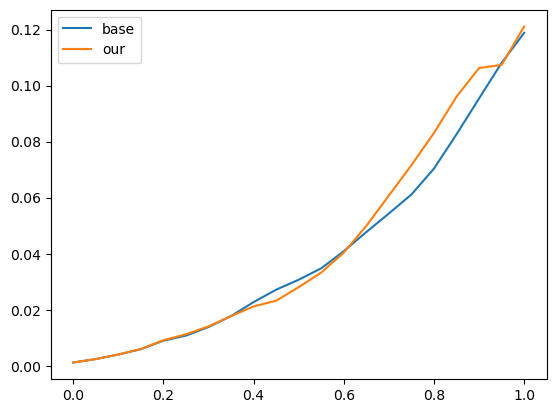

In [29]:
plt.plot(np.arange(0, 1.05, 0.05), (base / read_num), label="base")
plt.plot(np.arange(0, 1.05, 0.05), our / read_num, label = "our")
plt.legend()
